In [1]:
from toolkit import *

from PathLoader import PathLoader

path_loader = PathLoader('data_config.env', 'current_user.env')

folder_name = 'SYPipelineScript'
condition = 'SY_test'

# open pickle files
with open(f'{path_loader.get_data_path()}data/results/{folder_name}/total_df_{condition}.pkl', 'rb') as f:
    total_df = pickle.load(f)
    
with open(f'{path_loader.get_data_path()}data/results/{folder_name}/meta_df_{condition}.pkl', 'rb') as f:
    meta_df = pickle.load(f)
    
with open(f'{path_loader.get_data_path()}data/results/{folder_name}/rngs_list_{condition}.pkl', 'rb') as f:
    rngs_list = pickle.load(f)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
adjust_for_accuracy = True
df = total_df

# filter the dataframe by condition
df = df[df['condition'] == condition]

feature_importance = df['feature_importance']
rngs = df['rng']
accuracies = df['model_performance']

data_collector = []

# for each row in the feature importance column, append tuple (feature_name, score) to a list
accuracy_tuples = []
for fi_row, rng_row, accuracies in zip(feature_importance, rngs, accuracies):
    for feature_name, score in zip(fi_row[0], fi_row[1]):
        data_collector.append({'iteration_no': rng_row, 'feature_names': feature_name, 'scores': score})
        if adjust_for_accuracy:
            accuracy_tuples.append((feature_name, accuracies))

# convert the list to a dataframe
feature_importance_df = pd.DataFrame(data_collector)

# if adjust_for_accuracy is False, set accuracy_tuples to None
if not adjust_for_accuracy:
    accuracy_tuples = None

In [2]:
new_kit = Powerkit(None,None)

mean_contribution = new_kit.get_mean_contribution(total_df, condition, strict_mean=0.25)

In [3]:
mean_variation = get_variation(total_df, condition, use_iqr=True, strict_mean=0.25)

In [4]:
mean_performance = total_df.groupby('condition')['model_performance'].mean()[condition]

mean_performance

0.555500652806487

<AxesSubplot: xlabel='mean', ylabel='feature'>

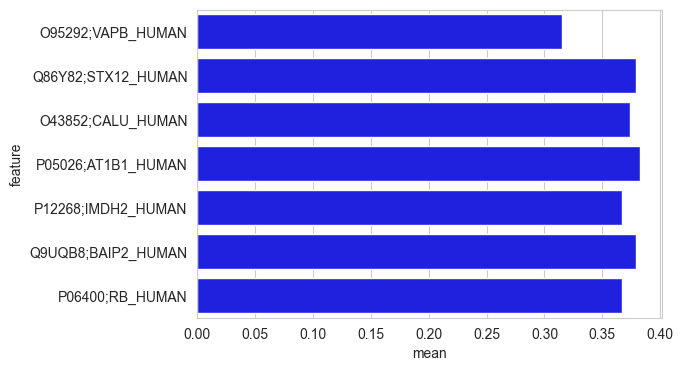

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style('whitegrid')

# plot mean and iqr of feature importance
fig, ax = plt.subplots(figsize=(6, 4))

# plot the mean in mean_variation
sns.barplot(x=mean_variation['mean'], y=mean_variation.index, color='blue', label='mean')


<AxesSubplot: xlabel='count', ylabel='feature'>

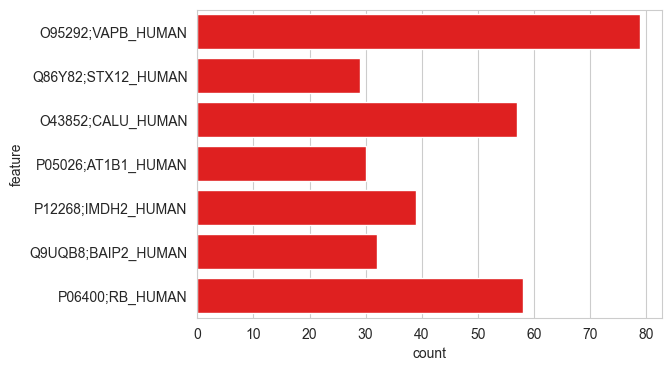

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style('whitegrid')

# plot mean and iqr of feature importance
fig, ax = plt.subplots(figsize=(6, 4))

# plot the mean in mean_variation
sns.barplot(x=mean_variation['count'], y=mean_variation.index, color='red', label='mean')


<AxesSubplot: xlabel='variability_score', ylabel='feature'>

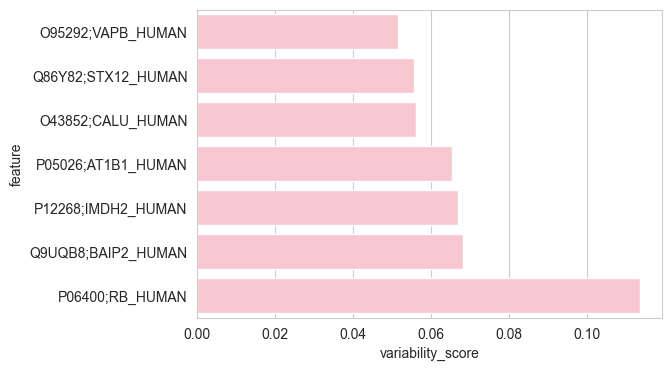

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style('whitegrid')

# plot mean and iqr of feature importance
fig, ax = plt.subplots(figsize=(6, 4))

# plot the mean in mean_variation
sns.barplot(x=mean_variation['variability_score'], y=mean_variation.index, color='pink', label='mean')


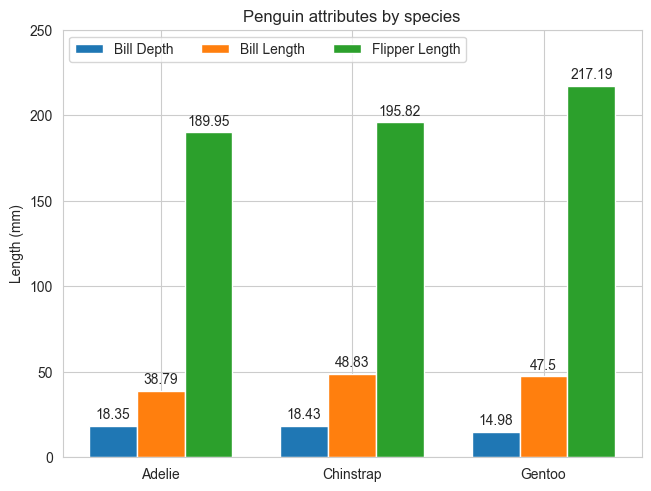

In [8]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

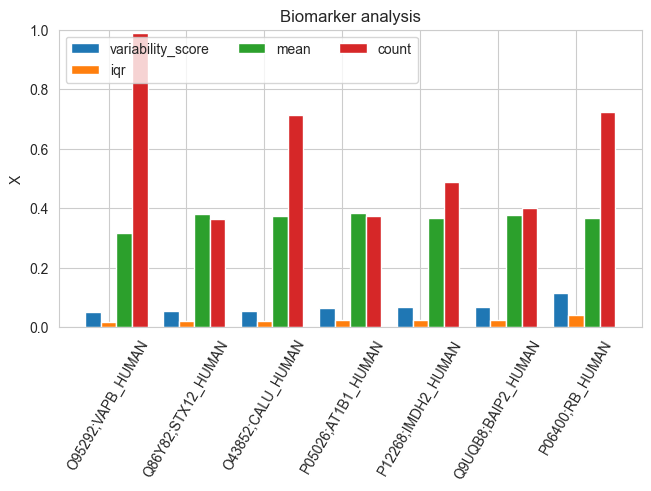

In [9]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

mean_variation = get_variation(total_df, condition, use_iqr=True, strict_mean=0.25)
mean_variation['count'] = mean_variation['count'] / 80
# min-max normalization for other attributes

biomarkers = mean_variation.index 

data = {}

for col in mean_variation.columns:
    data[col] = mean_variation[col].values


x = np.arange(len(biomarkers))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('X')
ax.set_title('Biomarker analysis')
ax.set_xticks(x + width, biomarkers)
ax.legend(loc='upper left', ncols=3)

# vertical x axis labels
ax.set_xticklabels(biomarkers, rotation=60)

ax.set_ylim(0, 1)

plt.show()
    
    


In [16]:
data = total_df['feature_importance']

# extract the feature names and scores from the feature importance column
feature_names = []
scores = []

for row in data:
    feature_names.append(row[0])
    scores.append(row[1])
    
print(len(feature_names), len(scores))

feature_names_all = []
scores_all = []

for feature_name, score in zip(feature_names, scores):
    for feature, score in zip(feature_name, score):
        feature_names_all.append(feature)
        scores_all.append(score)
        
print(len(feature_names_all), len(scores_all))

# create a dataframe from the feature names and scores
df = pd.DataFrame({'feature_names': feature_names_all, 'scores': scores_all})

df.head()

86 86
774 774


,feature_names,scores
0,O95292;VAPB_HUMAN,0.313831
1,Q92934;BAD_HUMAN,0.348435
2,O43852;CALU_HUMAN,0.364545
3,P12268;IMDH2_HUMAN,0.373027
4,P06400;RB_HUMAN,0.384901


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 [Text(0, 0, 'O95292;VAPB_HUMAN'),
  Text(1, 0, 'Q92934;BAD_HUMAN'),
  Text(2, 0, 'O43852;CALU_HUMAN'),
  Text(3, 0, 'P12268;IMDH2_HUMAN'),
  Text(4, 0, 'P06400;RB_HUMAN'),
  Text(5, 0, 'Q07817;B2CL1_HUMAN'),
  Text(6, 0, 'Q9UQB8;BAIP2_HUMAN'),
  Text(7, 0, 'P57737;CORO7_HUMAN'),
  Text(8, 0, 'P35221;CTNA1_HUMAN'),
  Text(9, 0, 'Q6WCQ1;MPRIP_HUMAN'),
  Text(10, 0, 'O15067;PUR4_HUMAN'),
  Text(11, 0, 'P10301;RRAS_HUMAN'),
  Text(12, 0, 'P05783;K1C18_HUMAN'),
  Text(13, 0, 'Q9UHQ9;NB5R1_HUMAN'),
  Text(14, 0, 'P25398;RS12_HUMAN'),
  Text(15, 0, 'Q86Y82;STX12

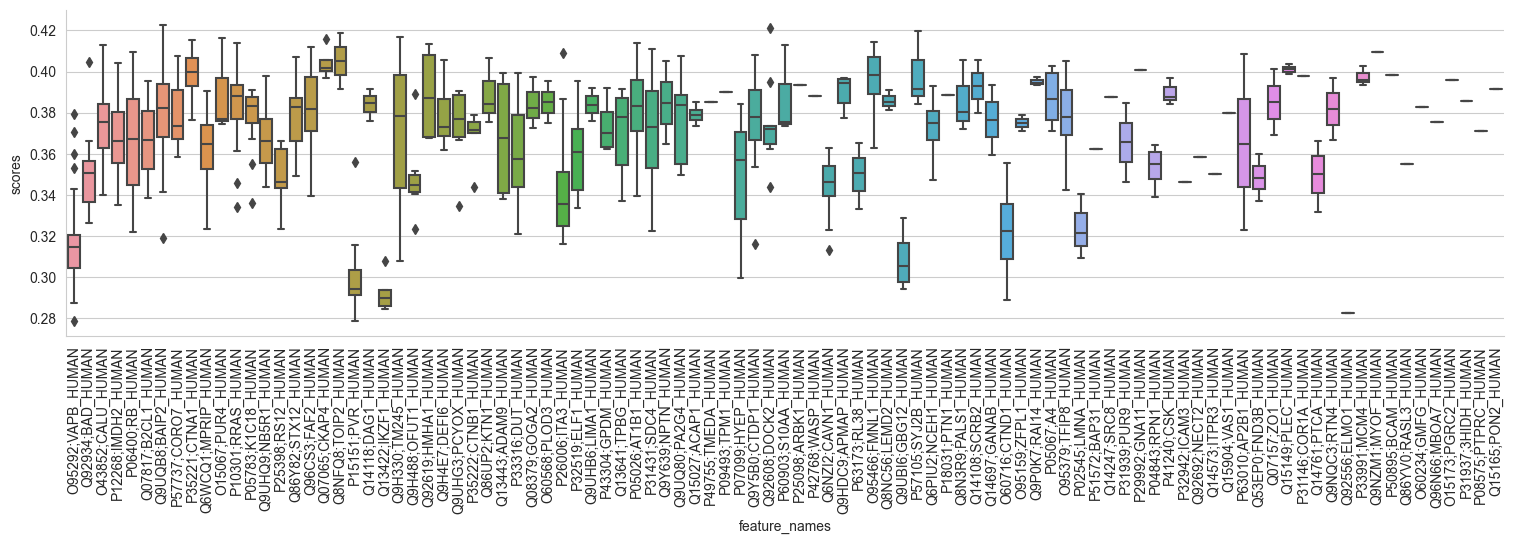

In [19]:
import seaborn as sns 

sns.catplot(x='feature_names', y='scores', data=df, kind='box', height=4, aspect=4)

# rotate x axis labels
plt.xticks(rotation=90)

Title: Image

Caption: Importance Scores distribution for all selected features  

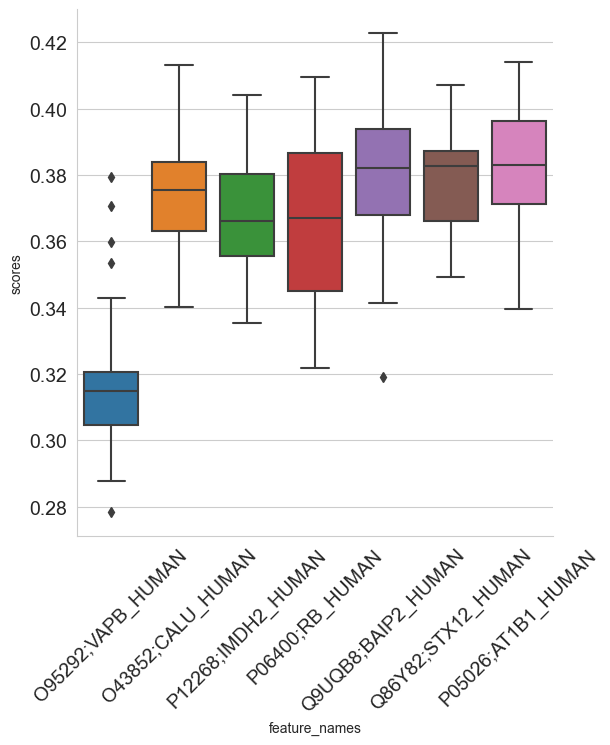

In [28]:
features_to_include = mean_variation.index

# filter the dataframe by the features to include
filtered_df = df[df['feature_names'].isin(features_to_include)]

# plot the boxplot

sns.catplot(x='feature_names', y='scores', data=filtered_df, kind='box', height=6, aspect=1)

# enlarge the x axis labels and y axis labels

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [29]:
crashes = sns.load_dataset("car_crashes")

crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [30]:
crashes.shape

(51, 8)

In [32]:
mean_variation.head()

,variability_score,iqr,mean,count
feature,,,,
O95292;VAPB_HUMAN,0.051578,0.016252,0.315098,0.9875
Q86Y82;STX12_HUMAN,0.055461,0.021048,0.379500,0.3625
O43852;CALU_HUMAN,0.056139,0.021011,0.374272,0.7125
P05026;AT1B1_HUMAN,0.065296,0.024996,0.382813,0.3750
P12268;IMDH2_HUMAN,0.066957,0.024584,0.367169,0.4875


In [41]:
mean_var_df = mean_variation.reset_index()

In [42]:
mean_var_df.head()

,feature,variability_score,iqr,mean,count
0,O95292;VAPB_HUMAN,0.051578,0.016252,0.315098,0.9875
1,Q86Y82;STX12_HUMAN,0.055461,0.021048,0.379500,0.3625
2,O43852;CALU_HUMAN,0.056139,0.021011,0.374272,0.7125
3,P05026;AT1B1_HUMAN,0.065296,0.024996,0.382813,0.3750
4,P12268;IMDH2_HUMAN,0.066957,0.024584,0.367169,0.4875


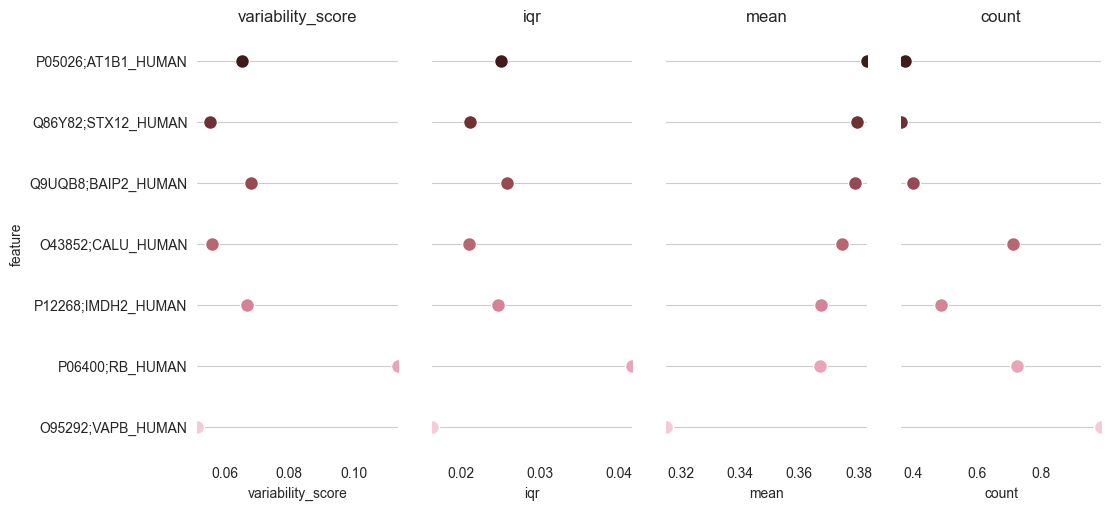

In [58]:
g = sns.PairGrid(mean_var_df.sort_values("mean", ascending=False), 
                 x_vars=mean_variation.columns, y_vars=['feature'], height=5, aspect=0.5)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", palette="ch:s=1,r=-.1,h=1_r", jitter=False, linewidth=1, edgecolor="w")


# Use semantically meaningful titles for the columns
titles = mean_variation.columns

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set(xlim=(mean_var_df[title].min(), mean_var_df[title].max()), xlabel=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
sns.despine(left=True, bottom=True)